<a href="https://colab.research.google.com/github/deepak-io-codes/OBISIP/blob/main/car_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
df=pd.read_csv('/content/car data.csv')
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
print(df.describe())

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [9]:
print(df.describe())
print(df.select_dtypes(include='object').nunique())
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000
Car_Name        98
Fuel_Type        3
Selling_type     2
Transmission     2
dtype: int64
Car_Name
city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Honda Activa 125       1
Hero Hunk              1
Hero  Ignitor Disc

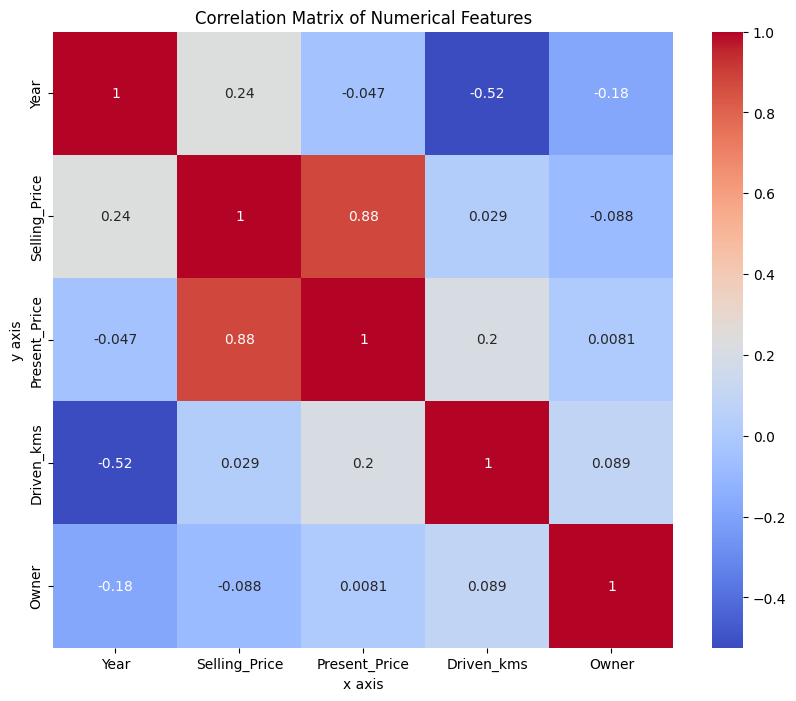

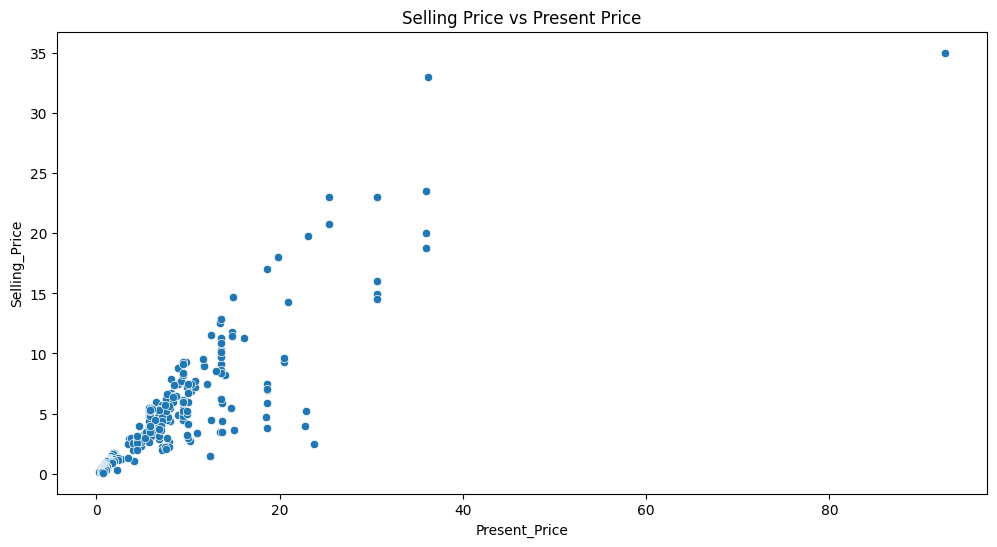

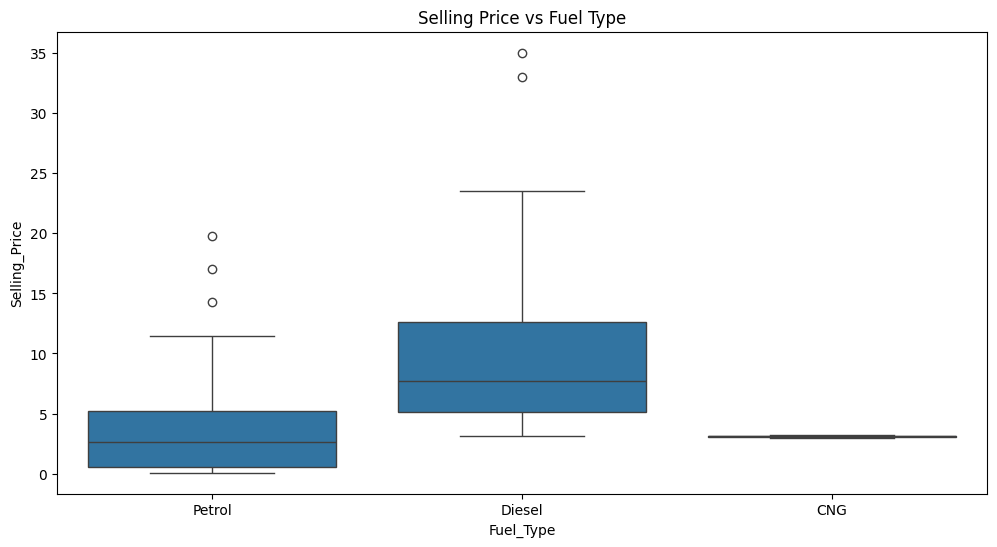

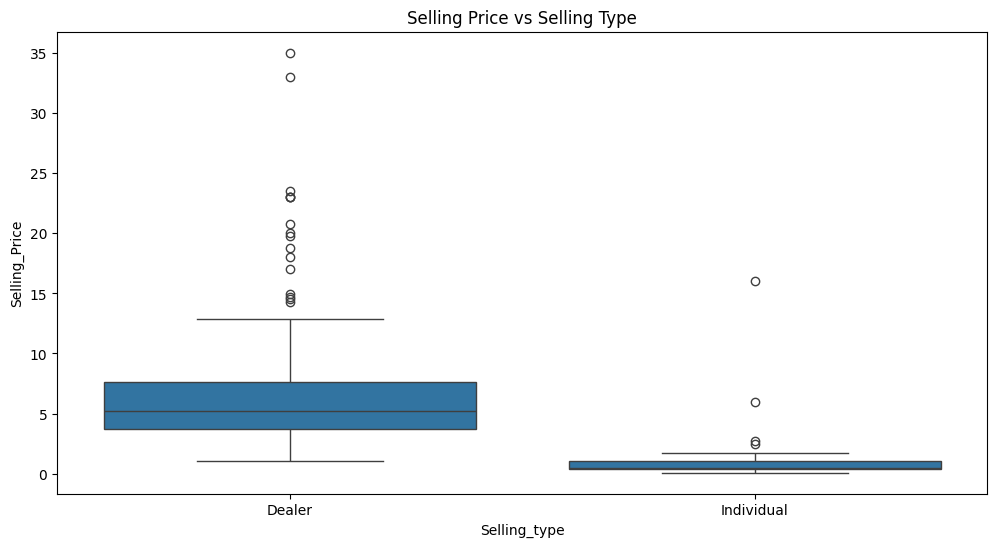

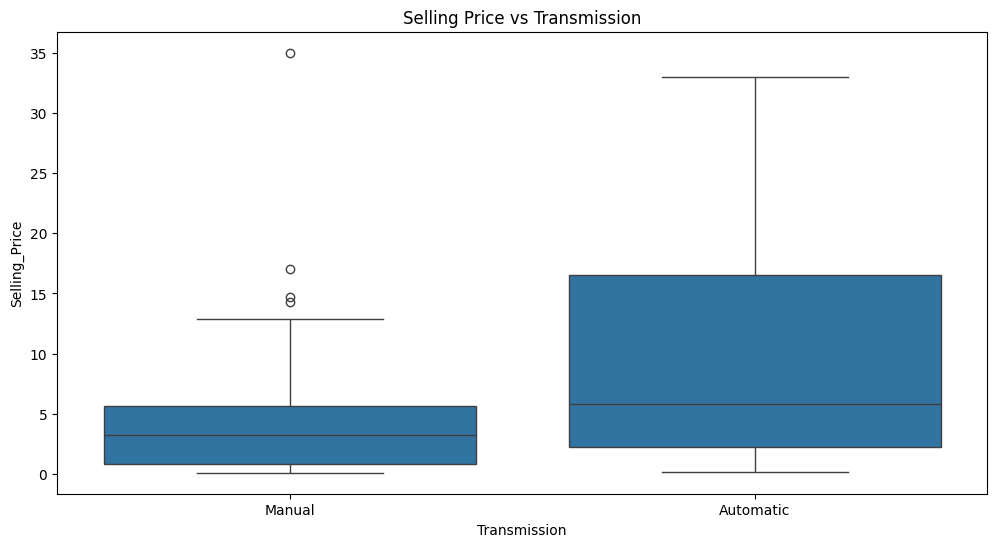

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Selling Price vs Present Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Selling Price vs Fuel Type')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Selling_type', y='Selling_Price', data=df)
plt.title('Selling Price vs Selling Type')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title('Selling Price vs Transmission')
plt.show()

In [13]:
df['Car_Age'] = 2025 - df['Year']
df.drop('Year', axis=1, inplace=True)
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)
df.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,ritz,3.35,5.59,27000,0,11,False,True,False,True
1,sx4,4.75,9.54,43000,0,12,True,False,False,True
2,ciaz,7.25,9.85,6900,0,8,False,True,False,True
3,wagon r,2.85,4.15,5200,0,14,False,True,False,True
4,swift,4.60,6.87,42450,0,11,True,False,False,True


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Absolute Error (MAE): 1.22
Mean Squared Error (MSE): 3.48
R-squared (R2): 0.85


In [16]:
y_pred = model.predict(X_test)